In [3]:
#importing the neccessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


<ipython-input-3-136d32023321>:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [4]:
# Loading the Dataset
df = pd.read_csv("TSLA (2).csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-28,19.527332,19.830667,19.183332,19.758667,19.758667,96349500
1,2019-01-29,19.684668,19.903999,19.453333,19.830667,19.830667,69325500
2,2019-01-30,20.030001,20.600000,19.899332,20.584667,20.584667,168754500
3,2019-01-31,20.066668,20.770666,19.600000,20.468000,20.468000,188538000
4,2019-02-01,20.361334,21.073334,20.233334,20.813999,20.813999,109251000


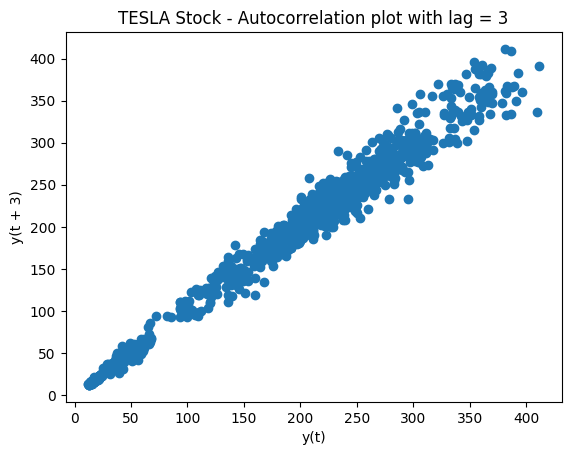

In [5]:
# Correlating the Data
plt.figure()
lag_plot(df['Open'], lag=3)
plt.title('TESLA Stock - Autocorrelation plot with lag = 3')
plt.show()

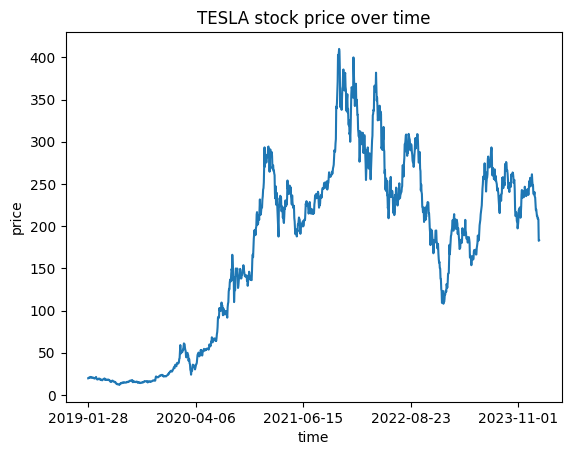

In [6]:
# Plotting the Stock price over time
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,1259,300), df['Date'][0:1259:300])
plt.title("TESLA stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [7]:
#Splitting the data
# Divide the data into 70 % train and 30 % test data
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
#Using the ARIMA Model

for time_point in range(N_test_observations):
    model =ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
# Calculating the MSE loss
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 55.65188062833017


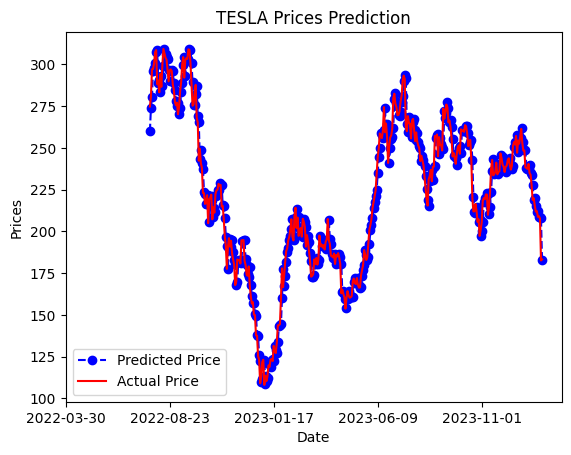

In [15]:
# Predicting for the test data
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(800,1259,100), df.Date[800:1259:100])
plt.legend()
plt.show()